In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
while not os.getcwd().endswith('Laboratorio_SiPM'):
    os.chdir('..')

import sys
sys.path.append('Config')
from lablib import *

### Funzioni utili

In [127]:
root_path = r'Dati/Parte 2/Caratterizzazione_impulso/'
skip = 18
errore_medio = 0.015 / np.sqrt(12)  

def read_data(filename, titles = ['Time', 'V']):
    df = read_corretto(root_path + filename, skip, titles)

    # Sostituire tutte le istanze di "," con "" nelle colonne: 'V', 'Time'
    df['V'] = df['V'].str.replace(",", "", case=False, regex=False)
    df['Time'] = df['Time'].str.replace(",", "", case=False, regex=False)

    # Converte le colonne in float
    df = df.astype(float)

    return df

def _crop_df(df, N, thr):
    df = crop_df(df, N, thr)
    df.index = np.arange(len(df))
    return df


def quick_plot(df):
    plt.plot(df['Time'], df['V'])
    plt.xlabel('Time')
    plt.ylabel('V')
    plt.title('Signal')
    plt.show()

def find_max(df):
    max_index = df['V'].idxmax()
    max_value = df['V'][max_index]

    return max_index, max_value

def exp_dec(x, a, b, c):
    return a * np.exp(-b * x) + c

def exp_cre(x, a, b, c):
    return a * (1 - np.exp(-b * x)) + c

def rise_fall(df):
    max_index, _ = find_max(df)

    rise_time = df['Time'][:max_index]
    fall_time = df['Time'][max_index:]
    rise_voltage = df['V'][:max_index]
    fall_voltage = df['V'][max_index:]

    rise = pd.DataFrame({'Time': rise_time, 'V': rise_voltage})
    fall = pd.DataFrame({'Time': fall_time, 'V': fall_voltage})
    return rise, fall



## BGO

### Na

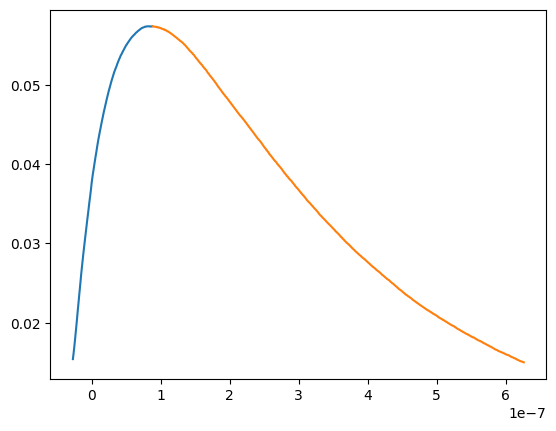

In [128]:
bgo_na = pd.read_csv(root_path + 'BGO_Na22.CSV')
bgo_na = _crop_df(bgo_na, 10, .015)

bgo_na_rise, bgo_na_fall = rise_fall(bgo_na)
bgo_na_ers1 = [errore_medio] * len(bgo_na_rise)
bgo_na_ers2 = [errore_medio] * len(bgo_na_fall)

plt.plot(bgo_na_rise['Time'], bgo_na_rise['V'], label='Rise')
plt.plot(bgo_na_fall['Time'], bgo_na_fall['V'], label='Fall')
plt.show()

In [129]:
pars1, vals1, ers1, *other1 = LS_fit(bgo_na_rise['Time'], bgo_na_rise['V'], bgo_na_ers1, exp_cre, 
                                            #limits = [['a', (0, 1)], ['b', (10_0000, None)]],
                                            a=.0035, b=21e6, c=0) # era solo un problema di inizializzazione

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.336 (χ²/ndof = 0.0)      │              Nfcn = 154              │
│ EDM = 1.59e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.0227   │  0.0018   │            │            │         │         │       │
│ 1 │ b    │  26.9e6   │   2.6e6   │            │            │         │         │       │
│ 2 │ c    │  37.8e-3  │  0.7e-3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────────────────┐
│   │               a               b               c │
├───┼─────────────────────────────────────────────────┤
│ a │        3.37e-06 -4.3784662044e3         -0.9e-6 │
│ b │ -4.3784662044e3        6.82e+12  1.1347349651e3 │
│ c │         -0.9e-6  1.1347349651e3        4.22e-07 │
└───┴─────────────────────────────────────────────────┘

In [130]:
pars2, vals2, ers2, *other2 = LS_fit(bgo_na_fall['Time'], bgo_na_fall['V'], bgo_na_ers2, exp_dec, a=1, b=0.01, c=0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 15.45 (χ²/ndof = 0.0)      │              Nfcn = 648              │
│ EDM = 2.82e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.088   │   0.004   │            │            │         │         │       │
│ 1 │ b    │  1.84e6   │  0.20e6   │            │            │         │         │       │
│ 2 │ c    │  -0.014   │   0.005   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │           a           b           c │
├───┼─────────────────────────────────────┤
│ a │    1.62e-05 -760.573269   -0.020e-3 │
│ b │ -760.573269    3.93e+10  993.046364 │
│ c │   -0.020e-3  993.046364    2.55e-05 │
└───┴─────────────────────────────────────┘

In [131]:
tau_bgo_na_rise = 1 / vals1[1] * 1e9
err_bgo_na_rise = 1 / vals1[1]**2 * ers1[1] * 1e9

tau_bgo_na_fall = 1 / vals2[1] * 1e9
err_bgo_na_fall = 1 / vals2[1]**2 * ers2[1] * 1e9

### Co

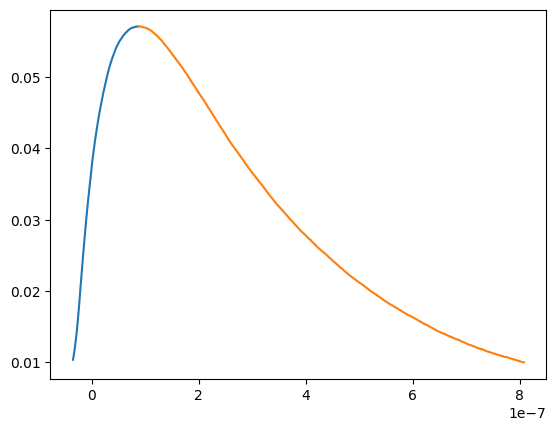

In [132]:
bgo_co = pd.read_csv(root_path + 'BGO_Co60.CSV')
bgo_co = _crop_df(bgo_co, 10, .01)

bgo_co_rise, bgo_co_fall = rise_fall(bgo_co)
bgo_co_ers1 = [errore_medio] * len(bgo_co_rise)
bgo_co_ers2 = [errore_medio] * len(bgo_co_fall)

plt.plot(bgo_co_rise['Time'], bgo_co_rise['V'], label='Rise')
plt.plot(bgo_co_fall['Time'], bgo_co_fall['V'], label='Fall')
plt.show()

In [133]:
pars3, vals3, ers3, *other3 = LS_fit(bgo_co_rise['Time'], bgo_co_rise['V'], bgo_co_ers1, exp_cre,
                                            a=.0035, b=21e6, c=0)
pars4, vals4, ers4, *other4 = LS_fit(bgo_co_fall['Time'], bgo_co_fall['V'], bgo_co_ers2, exp_dec,
                                            a=1, b=0.01, c=0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.376 (χ²/ndof = 0.0)      │              Nfcn = 139              │
│ EDM = 1.93e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.0240   │  0.0019   │            │            │         │         │       │
│ 1 │ b    │  23.8e6   │   2.0e6   │            │            │         │         │       │
│ 2 │ c    │  37.5e-3  │  0.6e-3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────────────────────────────────────────┐
│   │              a              b              c │
├───┼──────────────────────────────────────────────┤
│ a │       3.61e-06 -3.519613893e3        -0.9e-6 │
│ b │ -3.519613893e3       3.89e+12    901.5105014 │
│ c │        -0.9e-6    901.5105014       3.88e-07 │
└───┴──────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 22.47 (χ²/ndof = 0.0)      │              Nfcn = 591              │
│ EDM = 7.63e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.0788   │  0.0011   │            │            │         │         │       │
│ 1 │ b    │  2.29e6   │  0.12e6   │            │            │         │         │       │
│ 2 │ c    │  -0.0033  │  0.0017   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │           a           b           c │
├───┼─────────────────────────────────────┤
│ a │    1.14e-06 -76.3748348     -1.3e-6 │
│ b │ -76.3748348    1.48e+10 195.4991117 │
│ c │     -1.3e-6 195.4991117    2.73e-06 │
└───┴─────────────────────────────────────┘

In [134]:
tau_bgo_co_rise = 1 / vals3[1] * 1e9
err_bgo_co_rise = 1 / vals3[1]**2 * ers3[1] * 1e9

tau_bgo_co_fall = 1 / vals4[1] * 1e9
err_bgo_co_fall = 1 / vals4[1]**2 * ers4[1] * 1e9

## CSI

### Na

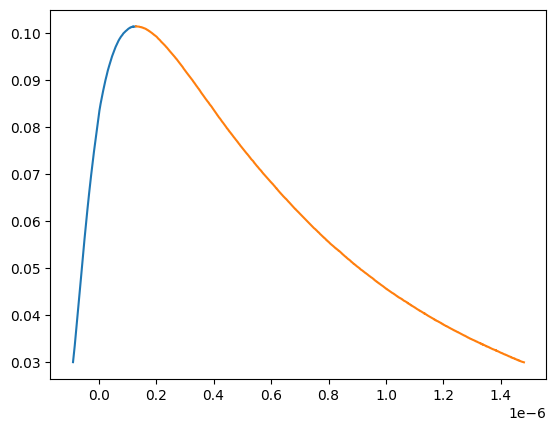

In [135]:
csi_na = pd.read_csv(root_path + 'CSI_Na22.CSV')
csi_na = _crop_df(csi_na, 10, .03)

csi_na_rise, csi_na_fall = rise_fall(csi_na)
csi_na_ers1 = [errore_medio] * len(csi_na_rise)
csi_na_ers2 = [errore_medio] * len(csi_na_fall)

plt.plot(csi_na_rise['Time'], csi_na_rise['V'], label='Rise')
plt.plot(csi_na_fall['Time'], csi_na_fall['V'], label='Fall')
plt.show()

In [136]:
pars5, vals5, ers5, *other5 = LS_fit(csi_na_rise['Time'], csi_na_rise['V'], csi_na_ers1, exp_cre,
                                            a=.0035, b=21e6, c=0)
pars6, vals6, ers6, *other6 = LS_fit(csi_na_fall['Time'], csi_na_fall['V'], csi_na_ers2, exp_dec,
                                            a=1, b=0.01, c=0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 21.73 (χ²/ndof = 0.1)      │              Nfcn = 124              │
│ EDM = 2.75e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.0283   │  0.0015   │            │            │         │         │       │
│ 1 │ b    │  12.3e6   │   0.5e6   │            │            │         │         │       │
│ 2 │ c    │  81.3e-3  │  0.4e-3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────────────────┐
│   │            a            b            c │
├───┼────────────────────────────────────────┤
│ a │     2.33e-06 -789.3973426     -0.46e-6 │
│ b │ -789.3973426     2.86e+11 170.38783670 │
│ c │     -0.46e-6 170.38783670     1.87e-07 │
└───┴────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 63.69 (χ²/ndof = 0.0)      │              Nfcn = 565              │
│ EDM = 0.000111 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.1226   │  0.0016   │            │            │         │         │       │
│ 1 │ b    │  0.926e6  │  0.031e6  │            │            │         │         │       │
│ 2 │ c    │  -0.0022  │  0.0020   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │           a           b           c │
├───┼─────────────────────────────────────┤
│ a │    2.55e-06 -45.0430214     -3.2e-6 │
│ b │ -45.0430214    9.54e+08   62.302419 │
│ c │     -3.2e-6   62.302419    4.19e-06 │
└───┴─────────────────────────────────────┘

In [137]:
tau_csi_na_rise = 1 / vals5[1] * 1e9
err_csi_na_rise = 1 / vals5[1]**2 * ers5[1] * 1e9

tau_csi_na_fall = 1 / vals6[1] * 1e9
err_csi_na_fall = 1 / vals6[1]**2 * ers6[1] * 1e9

### Co

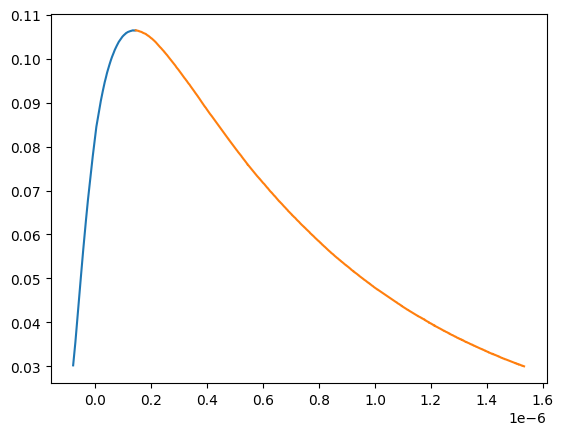

In [138]:
csi_co = pd.read_csv(root_path+'CSI_Co60.CSV')
csi_co = _crop_df(csi_co, 10, .03)

csi_co_rise, csi_co_fall = rise_fall(csi_co)
csi_co_ers1 = [errore_medio] * len(csi_co_rise)
csi_co_ers2 = [errore_medio] * len(csi_co_fall)

plt.plot(csi_co_rise['Time'], csi_co_rise['V'], label='Rise')
plt.plot(csi_co_fall['Time'], csi_co_fall['V'], label='Fall')
plt.show()

In [139]:
pars7, vals7, ers7, *other7 = LS_fit(csi_co_rise['Time'], csi_co_rise['V'], csi_co_ers1, exp_cre,
                                            a=.0035, b=21e6, c=0)
pars8, vals8, ers8, *other8 = LS_fit(csi_co_fall['Time'], csi_co_fall['V'], csi_co_ers2, exp_dec,
                                            a=1, b=0.01, c=0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 21.18 (χ²/ndof = 0.1)      │              Nfcn = 141              │
│ EDM = 2.77e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.0317   │  0.0014   │            │            │         │         │       │
│ 1 │ b    │  13.0e6   │   0.5e6   │            │            │         │         │       │
│ 2 │ c    │  82.1e-3  │  0.4e-3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────────────────┐
│   │            a            b            c │
├───┼────────────────────────────────────────┤
│ a │     1.94e-06 -670.6722682     -0.47e-6 │
│ b │ -670.6722682     2.53e+11 171.43727650 │
│ c │     -0.47e-6 171.43727650     2.01e-07 │
└───┴────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 64.09 (χ²/ndof = 0.0)      │              Nfcn = 514              │
│ EDM = 3.92e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.1282   │  0.0013   │            │            │         │         │       │
│ 1 │ b    │  0.978e6  │  0.028e6  │            │            │         │         │       │
│ 2 │ c    │  0.0003   │  0.0017   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │           a           b           c │
├───┼─────────────────────────────────────┤
│ a │    1.62e-06 -31.1034594     -2.1e-6 │
│ b │ -31.1034594    7.91e+08  47.8434701 │
│ c │     -2.1e-6  47.8434701       3e-06 │
└───┴─────────────────────────────────────┘

In [140]:
tau_csi_co_rise = 1 / vals7[1] * 1e9
err_csi_co_rise = 1 / vals7[1]**2 * ers7[1] * 1e9

tau_csi_co_fall = 1 / vals8[1] * 1e9
err_csi_co_fall = 1 / vals8[1]**2 * ers8[1] * 1e9

## Confronto

__Confronto tempi di discesa__

In [141]:
# Discesa

print(f'Fall BGO NA: {tau_bgo_na_fall:.2f} ± {err_bgo_na_fall:.2f} ns')
print(f'Fall BGO CO: {tau_bgo_co_fall:.2f} ± {err_bgo_co_fall:.2f} ns')
print('')
print(f'Fall CSI NA: {tau_csi_na_fall:.2f} ± {err_csi_na_fall:.2f} ns')
print(f'Fall CSI CO: {tau_csi_co_fall:.2f} ± {err_csi_co_fall:.2f} ns')

Fall BGO NA: 543.30 ± 58.55 ns
Fall BGO CO: 436.92 ± 23.22 ns

Fall CSI NA: 1079.89 ± 36.02 ns
Fall CSI CO: 1022.78 ± 29.43 ns


In [142]:
print(f'Compatibilita con BGO NA e CO: {TestCompatibilita(tau_bgo_na_fall, err_bgo_na_fall, tau_bgo_co_fall, err_bgo_co_fall):.3g}')
print(f'Compatibilita con CSI NA e CO: {TestCompatibilita(tau_csi_na_fall, err_csi_na_fall, tau_csi_co_fall, err_csi_co_fall):.3g}')

Compatibilita con BGO NA e CO: 1.69
Compatibilita con CSI NA e CO: 1.23


__Confronto tempi di salita__

In [143]:
# Salita

print(f'Rise BGO NA: {tau_bgo_na_rise:.2f} ± {err_bgo_na_rise:.2f} ns')
print(f'Rise BGO CO: {tau_bgo_co_rise:.2f} ± {err_bgo_co_rise:.2f} ns')
print('')
print(f'Rise CSI NA: {tau_csi_na_rise:.2f} ± {err_csi_na_rise:.2f} ns')
print(f'Rise CSI CO: {tau_csi_co_rise:.2f} ± {err_csi_co_rise:.2f} ns')

Rise BGO NA: 37.24 ± 3.62 ns
Rise BGO CO: 42.02 ± 3.48 ns

Rise CSI NA: 81.54 ± 3.56 ns
Rise CSI CO: 76.90 ± 2.97 ns


In [144]:
print(f'Compatibilita con BGO NA e CO: {TestCompatibilita(tau_bgo_na_rise, err_bgo_na_rise, tau_bgo_co_rise, err_bgo_co_rise):.3g}')
print(f'Compatibilita con CSI NA e CO: {TestCompatibilita(tau_csi_na_rise, err_csi_na_rise, tau_csi_co_rise, err_csi_co_rise):.3g}')

Compatibilita con BGO NA e CO: 0.952
Compatibilita con CSI NA e CO: 1


## Lyso

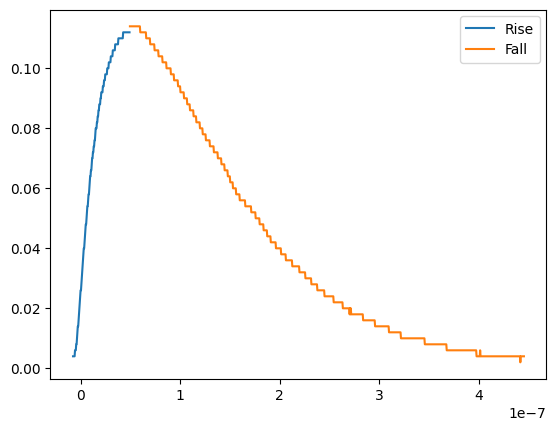

In [145]:
lyso = read_data('LySO/dat.CSV')
lyso = _crop_df(lyso, 10, .002)
lyso_rise, lyso_fall = rise_fall(lyso)

lyso_ers_rise = [.002] * len(lyso_rise['Time'])
lyso_ers_fall = [.002] * len(lyso_fall['Time'])

plt.plot(lyso_rise['Time'], lyso_rise['V'], label='Rise')
plt.plot(lyso_fall['Time'], lyso_fall['V'], label='Fall')
plt.legend()
plt.show()

In [146]:
pars_lyso_rise, vals_lyso_rise, ers_lyso_rise, *other_lyso_rise = LS_fit(lyso_rise['Time'], lyso_rise['V'], lyso_ers_rise, exp_cre,
                                            a=.0035, b=21e6, c=0)

pars_lyso_fall, vals_lyso_fall, ers_lyso_fall, *other_lyso_fall = LS_fit(lyso_fall['Time'], lyso_fall['V'], lyso_ers_fall, exp_dec,
                                            a=1, b=0.01, c=0)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 297.5 (χ²/ndof = 2.1)      │              Nfcn = 123              │
│ EDM = 2.11e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  97.7e-3  │  0.9e-3   │            │            │         │         │       │
│ 1 │ b    │  44.2e6   │   0.7e6   │            │            │         │         │       │
│ 2 │ c    │ 29.60e-3  │  0.28e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────────────────┐
│   │            a            b            c │
├───┼────────────────────────────────────────┤
│ a │     7.72e-07 -527.1175191     -0.11e-6 │
│ b │ -527.1175191     5.03e+11   7.91374612 │
│ c │     -0.11e-6   7.91374612     7.99e-08 │
└───┴────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2103 (χ²/ndof = 2.1)       │              Nfcn = 446              │
│ EDM = 8.31e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 190.8e-3  │  0.4e-3   │            │            │         │         │       │
│ 1 │ b    │  6.50e6   │  0.04e6   │            │            │         │         │       │
│ 2 │ c    │ -10.79e-3 │  0.29e-3  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────┐
│   │           a           b           c │
├───┼─────────────────────────────────────┤
│ a │    1.72e-07  8.86177341     0.03e-6 │
│ b │  8.86177341     1.5e+09 10.40018875 │
│ c │     0.03e-6 10.40018875    8.41e-08 │
└───┴─────────────────────────────────────┘

In [147]:
tau_lyso_rise = 1 / vals_lyso_rise[1] * 1e9
err_lyso_rise = 1 / vals_lyso_rise[1]**2 * ers_lyso_rise[1] * 1e9

tau_lyso_fall = 1 / vals_lyso_fall[1] * 1e9
err_lyso_fall = 1 / vals_lyso_fall[1]**2 * ers_lyso_fall[1] * 1e9

print(f'Rise LySO: {tau_lyso_rise:.2f} ± {err_lyso_rise:.2f} ns')
print(f'Fall LySO: {tau_lyso_fall:.2f} ± {err_lyso_fall:.2f} ns')

Rise LySO: 22.61 ± 0.36 ns
Fall LySO: 153.74 ± 0.92 ns


# Parte finale per relazione

__Print finale per facilitare letture__

Usando solo il sodio perche' ci si fida di piu'

In [148]:
print(f'BGO Rise and Fall: {tau_bgo_na_rise:.2f} ± {err_bgo_na_rise:.2f} ns, {tau_bgo_na_fall:.2f} ± {err_bgo_na_fall:.2f} ns')
print(f'Rapporto Rise/Fall BGO: {tau_bgo_na_rise / tau_bgo_na_fall:.2f}')
print('--------')
print(f'CSI Rise and Fall: {tau_csi_na_rise:.2f} ± {err_csi_na_rise:.2f} ns, {tau_csi_na_fall:.2f} ± {err_csi_na_fall:.2f} ns')
print(f'Rapporto Rise/Fall CSI: {tau_csi_na_rise / tau_csi_na_fall:.2f}')
print('--------')
print(f'Lyso Rise and Fall: {tau_lyso_rise:.2f} ± {err_lyso_rise:.2f} ns, {tau_lyso_fall:.2f} ± {err_lyso_fall:.2f} ns')
print(f'Rapporto Rise/Fall LySO: {tau_lyso_rise / tau_lyso_fall:.2f}')

BGO Rise and Fall: 37.24 ± 3.62 ns, 543.30 ± 58.55 ns
Rapporto Rise/Fall BGO: 0.07
--------
CSI Rise and Fall: 81.54 ± 3.56 ns, 1079.89 ± 36.02 ns
Rapporto Rise/Fall CSI: 0.08
--------
Lyso Rise and Fall: 22.61 ± 0.36 ns, 153.74 ± 0.92 ns
Rapporto Rise/Fall LySO: 0.15


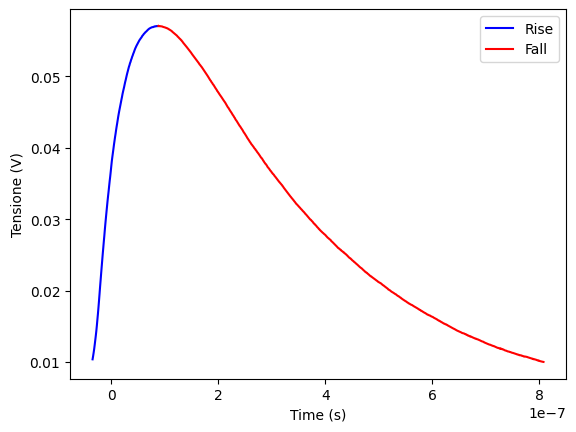

In [149]:
# plot per relazione

plt.plot(bgo_co_rise['Time'], bgo_co_rise['V'], label='Rise', color='blue')
plt.plot(bgo_co_fall['Time'], bgo_co_fall['V'], label='Fall', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Tensione (V)')
plt.legend()
plt.show()

__Commento sugli errori__

L'incertezza è stata presa all'oscilloscopio con la persistenza attiva e vedendo la larghezza della banda